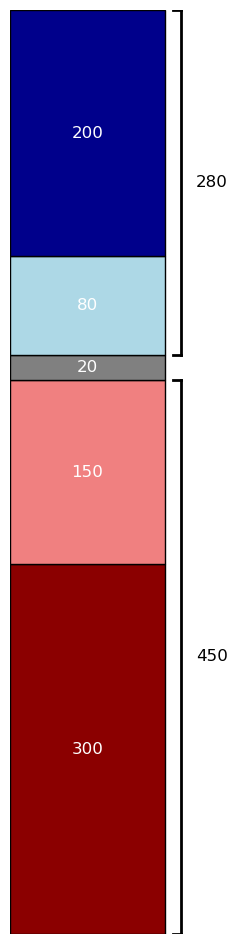

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

# Dane wejściowe
wartosci = [300, 150, 20, 80, 200]
kolory = ['darkred', 'lightcoral', 'grey', 'lightblue', 'darkblue']
etykiety = [str(w) for w in wartosci]

# Obliczenia proporcji i wysokości segmentów
suma_wartosci = sum(wartosci)
wysokosci = [ (w / suma_wartosci) * 6 for w in wartosci ]  # wysokości w cm

# Obliczenie pozycji dolnych segmentów
pozycje_dolne = [0]
for h in wysokosci[:-1]:
    pozycje_dolne.append(pozycje_dolne[-1] + h)

# Sumowanie wartości dla niebieskich i czerwonych
suma_czerwone = wartosci[0] + wartosci[1]
suma_niebieskie = wartosci[3] + wartosci[4]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(3, 12))

# Rysowanie segmentów i dodawanie etykiet
for i in range(len(wartosci)):
    rect = patches.Rectangle((0, pozycje_dolne[i]), 1, wysokosci[i], facecolor=kolory[i], edgecolor='black')
    ax.add_patch(rect)
    x = 0.5  # środek w osi x
    y = pozycje_dolne[i] + wysokosci[i]/2  # środek segmentu w osi y
    ax.text(x, y, etykiety[i], ha='center', va='center', fontsize=12, color='white')

# Dodanie klamer po prawej stronie
# Klamra dla czerwonych segmentów
ax.plot([1.1, 1.1], [pozycje_dolne[0], pozycje_dolne[1] + wysokosci[1]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[0], pozycje_dolne[0]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[1] + wysokosci[1], pozycje_dolne[1] + wysokosci[1]], color='black', lw=2)
ax.text(1.2, (pozycje_dolne[0] + pozycje_dolne[1] + wysokosci[1]) / 2, str(suma_czerwone),
        ha='left', va='center', fontsize=12, color='black')

# Klamra dla niebieskich segmentów
ax.plot([1.1, 1.1], [pozycje_dolne[3], pozycje_dolne[4] + wysokosci[4]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[3], pozycje_dolne[3]], color='black', lw=2)
ax.plot([1.1, 1.05], [pozycje_dolne[4] + wysokosci[4], pozycje_dolne[4] + wysokosci[4]], color='black', lw=2)
ax.text(1.2, (pozycje_dolne[3] + pozycje_dolne[4] + wysokosci[4]) / 2, str(suma_niebieskie),
        ha='left', va='center', fontsize=12, color='black')

# Ustawienia osi i wyświetlenie wykresu
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 6)
ax.axis('off')

plt.show()